<a href="https://colab.research.google.com/github/Faareh-Ahmed/Segment-Green-Spaces/blob/main/GreenSpaceSAM2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Change the runtime to GPU

In [1]:
%pip install -U segment-geospatial

In [2]:
import leafmap
from samgeo import SamGeo2

# Mount Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
import os

# Path to your folder
folder_path = '/content/drive/My Drive/Sentinel2ATarbela'

# List files in the folder to verify access
print(os.listdir(folder_path))

['20200301.tif', '20190819.tif', '20181217.tif', '20210120.tif', '20201017.tif', '20221216.tif', '20211126.tif']


In [65]:
# List files in the folder to verify access
# files = os.listdir(folder_path)
# print("Original files:", files)
files = os.listdir(folder_path)
print("Original files:", files)
# Iterate through the files and rename them
for filename in files:
    if filename.endswith('.tif'):
        # Extract the date part from the filename
        date_str = filename[:-4]  # Remove the '.tif' extension
        # Convert to the desired format
        new_date_str = date_str.replace('-', '')  # Remove dashes
        new_filename = f"{new_date_str}.tif"  # Add the .tif extension

        # Create full paths for the old and new filenames
        old_file_path = os.path.join(folder_path, filename)
        new_file_path = os.path.join(folder_path, new_filename)

        # Rename the file
        os.rename(old_file_path, new_file_path)
        print(f'Renamed: {filename} to {new_filename}')

# List files again to verify the changes
print(os.listdir(folder_path))

Original files: ['2020-03-01.tif', '2019-08-19.tif', '2018-12-17.tif', '2021-01-20.tif', '2020-10-17.tif', '2022-12-16.tif', '2021-11-26.tif']
Renamed: 2020-03-01.tif to 20200301.tif
Renamed: 2019-08-19.tif to 20190819.tif
Renamed: 2018-12-17.tif to 20181217.tif
Renamed: 2021-01-20.tif to 20210120.tif
Renamed: 2020-10-17.tif to 20201017.tif
Renamed: 2022-12-16.tif to 20221216.tif
Renamed: 2021-11-26.tif to 20211126.tif
['20200301.tif', '20190819.tif', '20181217.tif', '20210120.tif', '20201017.tif', '20221216.tif', '20211126.tif']


# Initialize Model

In [67]:
predictor = SamGeo2(
    model_id="sam2-hiera-large",
    video=True,
)

# Specify the Input Data Path

In [68]:

predictor.set_video(folder_path)

frame loading (JPEG): 100%|██████████| 7/7 [00:00<00:00, 23.77it/s]


interactive(children=(IntSlider(value=0, description='Image', max=6), Output()), _dom_classes=('widget-interac…

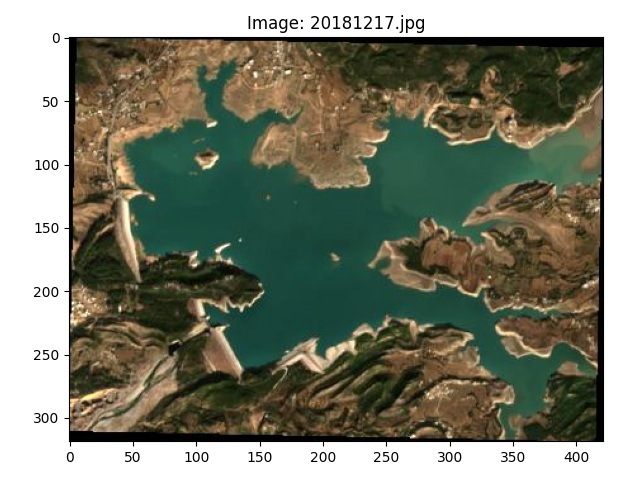

In [69]:
predictor.show_images()

# Prompts for Sentinel2ANewShort

In [52]:
prompts = {}

# Define the points and labels that will be the same for each frame
points = [[793,386],[1634,587],[611,807],[1497,692],[1456,62],[684,1195],[492,496] ,[1556,820],[1520,1295],[373,770],[1236,181],[1209,953], [734, 1629],[200,838],[1195,1514],[1163,697],[1862,784],[1163,706],[1072,386]]
labels = [1,1, 1,1,1,1,1,1,0,1,1,1, 0,0,0,0,0,0,0]

# Loop to generate prompts for frame_idx from 0 to 85
for i in range(5):
    prompts[i] = {
        "points": points,
        "labels": labels,
        "frame_idx": i,
    }

# Output the prompts dictionary
print(prompts)


{0: {'points': [[793, 386], [1634, 587], [611, 807], [1497, 692], [1456, 62], [684, 1195], [492, 496], [1556, 820], [1520, 1295], [373, 770], [1236, 181], [1209, 953], [734, 1629], [200, 838], [1195, 1514], [1163, 697], [1862, 784], [1163, 706], [1072, 386]], 'labels': [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 'frame_idx': 0}, 1: {'points': [[793, 386], [1634, 587], [611, 807], [1497, 692], [1456, 62], [684, 1195], [492, 496], [1556, 820], [1520, 1295], [373, 770], [1236, 181], [1209, 953], [734, 1629], [200, 838], [1195, 1514], [1163, 697], [1862, 784], [1163, 706], [1072, 386]], 'labels': [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], 'frame_idx': 1}, 2: {'points': [[793, 386], [1634, 587], [611, 807], [1497, 692], [1456, 62], [684, 1195], [492, 496], [1556, 820], [1520, 1295], [373, 770], [1236, 181], [1209, 953], [734, 1629], [200, 838], [1195, 1514], [1163, 697], [1862, 784], [1163, 706], [1072, 386]], 'labels': [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 

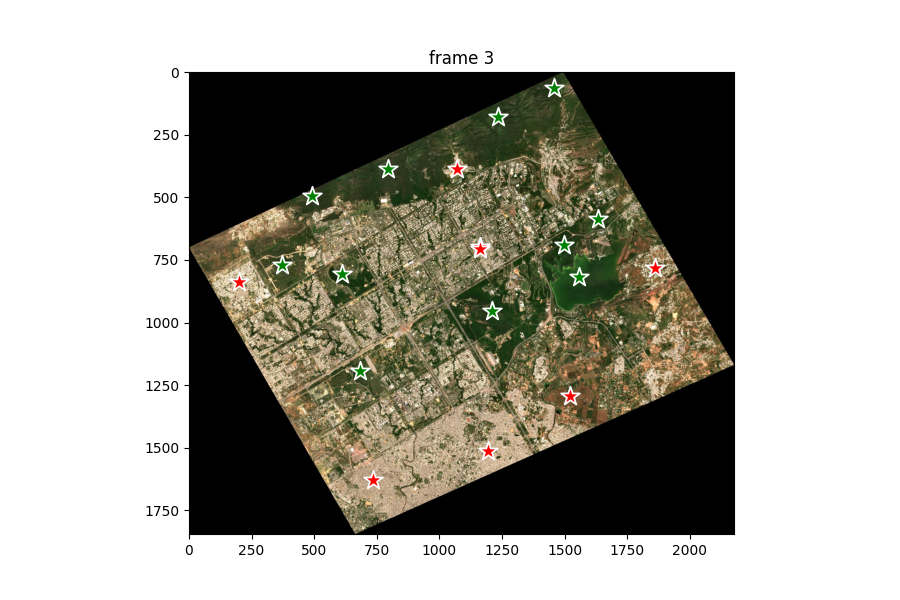

In [60]:
predictor.show_prompts(prompts, frame_idx=3)

# Segment the Objects

In [54]:
predictor.predict_video()

propagate in video: 100%|██████████| 5/5 [00:00<00:00, 71.76it/s]


# Save Results

In [55]:
predictor.save_video_segments("segmentsofSentinel2ANewShort")

Rendering frames: 100%|██████████| 5/5 [00:00<00:00, 15.68it/s]


In [59]:
predictor.save_video_segments_blended(
    "TS_blended_Sentinel2A_New_Short", fps=5, output_video="/content/segments_blended_Sentinel2ANew_Short.mp4"
)

Rendering frames: 100%|██████████| 5/5 [00:56<00:00, 11.34s/it]


Video saved as /content/segments_blended_Sentinel2ANew_Short.mp4
